In [1]:
import pandas as pd
from pandasql import sqldf

pd.set_option('display.max_columns', None)

In [2]:
# load data
path = "samples/trams.csv"
df = pd.read_csv(path)

In [3]:
cols_subset = ['lp.last_stop.arrival_time', 'lp.last_stop.departure_time',
       'lp.last_stop.id', 'lp.last_stop.sequence', 'lp.next_stop.arrival_time',
       'lp.next_stop.departure_time', 'lp.next_stop.id',
       'lp.next_stop.sequence', 'lp.delay.actual',
       'lp.delay.last_stop_arrival', 'lp.delay.last_stop_departure',
       'lp.bearing', 'lp.origin_timestamp',
       'lp.shape_dist_traveled', 'lp.state_position',
       'lp.tracking', 'pr.gtfs.route_id', 'pr.gtfs.route_short_name',
       'pr.gtfs.route_type', 'pr.gtfs.trip_headsign', 'pr.gtfs.trip_id', 'pr.vehicle_type.description_cs',
       'pr.vehicle_type.description_en', 'pr.vehicle_type.id', 'pr.agency_name',
       'pr.origin_route_name', 'pr.sequence_id', 'pr.start_timestamp',
       'pr.vehicle_registration_number', 'pr.wheelchair_accessible', 'coordinates']
df = df[cols_subset]
df.iloc[:5, :]

,lp.last_stop.arrival_time,lp.last_stop.departure_time,lp.last_stop.id,lp.last_stop.sequence,lp.next_stop.arrival_time,lp.next_stop.departure_time,lp.next_stop.id,lp.next_stop.sequence,lp.delay.actual,lp.delay.last_stop_arrival,lp.delay.last_stop_departure,lp.bearing,lp.origin_timestamp,lp.shape_dist_traveled,lp.state_position,lp.tracking,pr.gtfs.route_id,pr.gtfs.route_short_name,pr.gtfs.route_type,pr.gtfs.trip_headsign,pr.gtfs.trip_id,pr.vehicle_type.description_cs,pr.vehicle_type.description_en,pr.vehicle_type.id,pr.agency_name,pr.origin_route_name,pr.sequence_id,pr.start_timestamp,pr.vehicle_registration_number,pr.wheelchair_accessible,coordinates
0,2023-01-27T15:15:00+01:00,2023-01-27T15:15:00+01:00,U289Z4P,22,2023-01-27T15:15:00+01:00,2023-01-27T15:15:00+01:00,U289Z4P,22,207,207.0,NaN,278,2023-01-27T15:18:27+01:00,11.300,at_stop,True,L15,15,0,Kotlářka,15_4472_230103,tramvaj,tram,2,"{'real': 'DP PRAHA', 'scheduled': 'DP PRAHA'}",15,8,2023-01-27T14:39:00+01:00,9378,True,['14.364' '50.06982']
1,2023-01-27T15:11:00+01:00,2023-01-27T15:11:00+01:00,U593Z1P,6,2023-01-27T15:12:00+01:00,2023-01-27T15:12:00+01:00,U703Z1P,7,535,535.0,NaN,182,2023-01-27T15:19:55+01:00,2.348,at_stop,True,L17,17,0,Sídliště Modřany,17_15372_230116,tramvaj,tram,2,"{'real': 'DP PRAHA', 'scheduled': 'DP PRAHA'}",17,15,2023-01-27T15:04:00+01:00,9133,True,['14.41767' '50.09215']
2,2023-01-27T15:17:00+01:00,2023-01-27T15:17:00+01:00,U906Z4P,28,2023-01-27T15:20:00+01:00,2023-01-27T15:20:00+01:00,U126Z3P,29,185,138.0,185.0,356,2023-01-27T15:20:05+01:00,13.639,on_track,True,L8,8,0,Nádraží Podbaba,8_4611_221123,tramvaj,tram,2,"{'real': 'DP PRAHA', 'scheduled': 'DP PRAHA'}",8,9,2023-01-27T14:37:00+01:00,9285,True,['14.39464' '50.10766']
3,2023-01-27T15:14:00+01:00,2023-01-27T15:14:00+01:00,U476Z1P,21,2023-01-27T15:16:00+01:00,2023-01-27T15:16:00+01:00,U190Z1P,22,276,229.0,276.0,270,2023-01-27T15:18:36+01:00,8.672,on_track,True,L22,22,0,Bílá Hora,22_9344_230103,tramvaj,tram,2,"{'real': 'DP PRAHA', 'scheduled': 'DP PRAHA'}",22,6,2023-01-27T14:50:00+01:00,8358,False,['14.436' '50.07501']
4,2023-01-27T15:19:00+01:00,2023-01-27T15:19:00+01:00,U354Z2P,22,2023-01-27T15:20:00+01:00,2023-01-27T15:20:00+01:00,U301Z2P,23,18,-28.0,18.0,120,2023-01-27T15:19:18+01:00,10.846,on_track,True,L22,22,0,Nádraží Hostivař,22_8801_221227,tramvaj,tram,2,"{'real': 'DP PRAHA', 'scheduled': 'DP PRAHA'}",22,14,2023-01-27T14:44:00+01:00,9311,True,['14.44149' '50.07307']


In [4]:
# sample query that shows how to use `columns`` with dot in their name
query = "SELECT * FROM df WHERE `pr.gtfs.trip_id` = '17_15372_230116' LIMIT 3"

sqldf(query)

,lp.last_stop.arrival_time,lp.last_stop.departure_time,lp.last_stop.id,lp.last_stop.sequence,lp.next_stop.arrival_time,lp.next_stop.departure_time,lp.next_stop.id,lp.next_stop.sequence,lp.delay.actual,lp.delay.last_stop_arrival,lp.delay.last_stop_departure,lp.bearing,lp.origin_timestamp,lp.shape_dist_traveled,lp.state_position,lp.tracking,pr.gtfs.route_id,pr.gtfs.route_short_name,pr.gtfs.route_type,pr.gtfs.trip_headsign,pr.gtfs.trip_id,pr.vehicle_type.description_cs,pr.vehicle_type.description_en,pr.vehicle_type.id,pr.agency_name,pr.origin_route_name,pr.sequence_id,pr.start_timestamp,pr.vehicle_registration_number,pr.wheelchair_accessible,coordinates
0,2023-01-27T15:11:00+01:00,2023-01-27T15:11:00+01:00,U593Z1P,6,2023-01-27T15:12:00+01:00,2023-01-27T15:12:00+01:00,U703Z1P,7,535,535.0,NaN,182,2023-01-27T15:19:55+01:00,2.348,at_stop,1,L17,17,0,Sídliště Modřany,17_15372_230116,tramvaj,tram,2,"{'real': 'DP PRAHA', 'scheduled': 'DP PRAHA'}",17,15,2023-01-27T15:04:00+01:00,9133,1,['14.41767' '50.09215']
1,2023-01-27T15:11:00+01:00,2023-01-27T15:11:00+01:00,U593Z1P,6,2023-01-27T15:12:00+01:00,2023-01-27T15:12:00+01:00,U703Z1P,7,565,535.0,565.0,182,2023-01-27T15:20:25+01:00,2.348,on_track,1,L17,17,0,Sídliště Modřany,17_15372_230116,tramvaj,tram,2,"{'real': 'DP PRAHA', 'scheduled': 'DP PRAHA'}",17,15,2023-01-27T15:04:00+01:00,9133,1,['14.41796' '50.09168']
2,2023-01-27T15:12:00+01:00,2023-01-27T15:12:00+01:00,U703Z1P,7,2023-01-27T15:14:00+01:00,2023-01-27T15:14:00+01:00,U221Z1P,8,575,575.0,NaN,196,2023-01-27T15:21:35+01:00,2.797,at_stop,1,L17,17,0,Sídliště Modřany,17_15372_230116,tramvaj,tram,2,"{'real': 'DP PRAHA', 'scheduled': 'DP PRAHA'}",17,15,2023-01-27T15:04:00+01:00,9133,1,['14.41557' '50.08865']


In [5]:
query = """
SELECT ROW_NUMBER() OVER(PARTITION BY `pr.gtfs.trip_id` ORDER BY `lp.shape_dist_traveled` ASC) as trip_msg_order,  * from df
"""

df_orders = sqldf(query)

In [13]:
df_orders.head()

,trip_msg_order,lp.last_stop.arrival_time,lp.last_stop.departure_time,lp.last_stop.id,lp.last_stop.sequence,lp.next_stop.arrival_time,lp.next_stop.departure_time,lp.next_stop.id,lp.next_stop.sequence,lp.delay.actual,lp.delay.last_stop_arrival,lp.delay.last_stop_departure,lp.bearing,lp.origin_timestamp,lp.shape_dist_traveled,lp.state_position,lp.tracking,pr.gtfs.route_id,pr.gtfs.route_short_name,pr.gtfs.route_type,pr.gtfs.trip_headsign,pr.gtfs.trip_id,pr.vehicle_type.description_cs,pr.vehicle_type.description_en,pr.vehicle_type.id,pr.agency_name,pr.origin_route_name,pr.sequence_id,pr.start_timestamp,pr.vehicle_registration_number,pr.wheelchair_accessible,coordinates
0,1,2023-01-27T15:20:00+01:00,2023-01-27T15:20:00+01:00,U612Z2P,38,2023-01-27T15:20:00+01:00,2023-01-27T15:20:00+01:00,U612Z2P,38,-44,-44.0,NaN,276,2023-01-27T15:19:16+01:00,17.044,at_stop,1,L10,10,0,Sídliště Řepy,10_4731_220901,tramvaj,tram,2,"{'real': 'DP PRAHA', 'scheduled': 'DP PRAHA'}",10,6,2023-01-27T14:25:00+01:00,9413,1,['14.29843' '50.06534']
1,2,2023-01-27T15:20:00+01:00,2023-01-27T15:20:00+01:00,U612Z2P,38,2023-01-27T15:20:00+01:00,2023-01-27T15:20:00+01:00,U612Z2P,38,-44,-44.0,NaN,276,2023-01-27T15:19:16+01:00,17.044,at_stop,1,L10,10,0,Sídliště Řepy,10_4731_220901,tramvaj,tram,2,"{'real': 'DP PRAHA', 'scheduled': 'DP PRAHA'}",10,6,2023-01-27T14:25:00+01:00,9413,1,['14.29843' '50.06534']
2,3,2023-01-27T15:20:00+01:00,2023-01-27T15:20:00+01:00,U612Z2P,38,2023-01-27T15:20:00+01:00,2023-01-27T15:20:00+01:00,U612Z2P,38,-44,-44.0,NaN,276,2023-01-27T15:19:16+01:00,17.044,at_stop,1,L10,10,0,Sídliště Řepy,10_4731_220901,tramvaj,tram,2,"{'real': 'DP PRAHA', 'scheduled': 'DP PRAHA'}",10,6,2023-01-27T14:25:00+01:00,9413,1,['14.29843' '50.06534']
3,4,2023-01-27T15:20:00+01:00,2023-01-27T15:20:00+01:00,U612Z2P,38,2023-01-27T15:20:00+01:00,2023-01-27T15:20:00+01:00,U612Z2P,38,-44,-44.0,NaN,276,2023-01-27T15:19:16+01:00,17.044,at_stop,1,L10,10,0,Sídliště Řepy,10_4731_220901,tramvaj,tram,2,"{'real': 'DP PRAHA', 'scheduled': 'DP PRAHA'}",10,6,2023-01-27T14:25:00+01:00,9413,1,['14.29843' '50.06534']
4,5,2023-01-27T15:20:00+01:00,2023-01-27T15:20:00+01:00,U612Z2P,38,2023-01-27T15:20:00+01:00,2023-01-27T15:20:00+01:00,U612Z2P,38,-44,-44.0,NaN,276,2023-01-27T15:19:16+01:00,17.044,at_stop,1,L10,10,0,Sídliště Řepy,10_4731_220901,tramvaj,tram,2,"{'real': 'DP PRAHA', 'scheduled': 'DP PRAHA'}",10,6,2023-01-27T14:25:00+01:00,9413,1,['14.29843' '50.06534']


In [7]:
query = """
SELECT 
    T2.coordinates, 
    (T2.`lp.delay.actual` - T1.`lp.delay.actual`) AS delay_delta 
FROM
df_orders as T1, df_orders T2
WHERE (T1.trip_msg_order + 1) = T2.trip_msg_order
ORDER BY delay_delta ASC
"""

df_delta_delay = sqldf(query)

In [8]:
query = """
SELECT count, min_delta,
CAST(SUBSTR(tmp, 1, INSTR(tmp,' ') -1) AS DOUBLE) AS x,
CAST(SUBSTR(tmp, INSTR(tmp,' '), LENGTH(tmp)) AS DOUBLE) AS y
FROM
(SELECT
    count(*) as count, 
    MIN(delay_delta) as min_delta, 
    replace(replace(replace(coordinates, '[', ''), ']', ''), "'", '') as tmp
FROM df_delta_delay
WHERE delay_delta < 100
GROUP BY coordinates
ORDER BY count DESC)
"""

# cast(coordinates[0] as double) AS x,
# cast(coordinates[1] as double) AS y

df_delay_improvements = sqldf(query)

In [14]:
df_delay_improvements.head()

,count,min_delta,x,y
0,6570,-1609,14.39329,50.07223
1,6310,-1749,14.29843,50.06534
2,5407,-1629,14.39549,50.09981
3,4929,-1607,14.41457,50.08145
4,4819,-1725,14.46236,50.07794


In [10]:
import osmnx as ox

In [11]:
custom_filter='["highway"~"motorway|motorway_link|trunk|trunk_link|primary|primary_link|secondary|secondary_link|road|road_link"]'
G = ox.graph_from_place("Praha, Czechia", custom_filter=custom_filter)

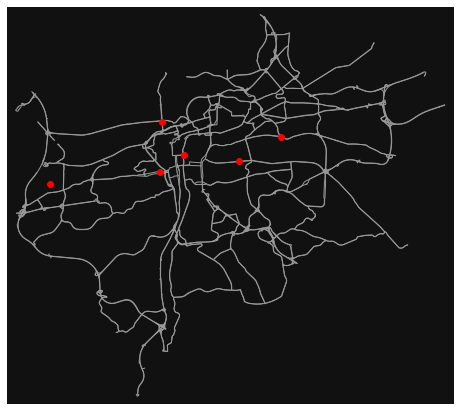

In [12]:
import matplotlib.pyplot as plt
# this makes your plot wait and not closing
fig, ax = ox.plot_graph(G, show=False, close=False, node_size=0)
# you can plot all, or some subsection for quicker result
x = df_delay_improvements.loc[0:5,'x']
y = df_delay_improvements.loc[0:5,'y']
ax.scatter(x, y, c='red')
plt.show()